# Задание 1

Простая реализация стохастика, вроде как работает лучше

In [1]:
import random
import numpy as np

def stochastic_gradient_descent(X, y, learning_rate=0.01, max_epochs=100):
    """
    Реализация стохастического градиентного спуска.

    Параметры:
    X - матрица объектов размера (n_samples, n_features).
    y - вектор меток размера (n_samples).
    learning_rate - скорость обучения (по умолчанию 0.01).
    epochs - количество эпох (по умолчанию 100).

    Возвращает:
    w - вектор весов размера (n_features).
    b - значение сдвига.
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(max_epochs):
        for i in range(n_samples):
            # Выбираем случайный образец
            random_index = random.randint(0, n_samples - 1)
            sample = X[random_index]
            label = y[random_index]

            # Вычисляем градиенты
            y_hat = np.dot(sample, w) + b
            grad_w = 2 * sample * (y_hat - label)
            grad_b = 2 * (y_hat - label)

            # Обновляем веса
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

    return w, b


Коэффициенты уравнения прямой:
y = 7.00 * x + 8.00
Вычисленные коэффициенты уравнения прямой:
y = [6.98086956] * x + [7.97695843]


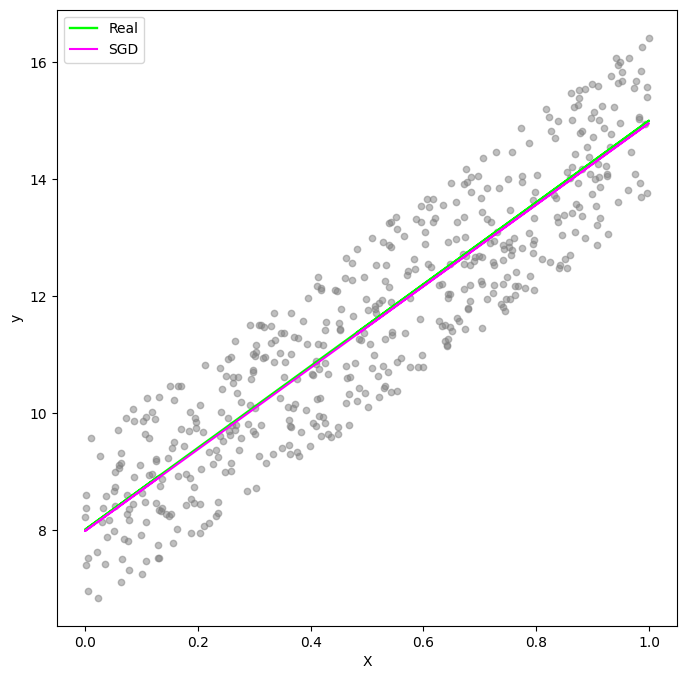

In [3]:
# ======== style-parameters
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# =========================

# Генерируем случайные точки
real_weight, real_bias = 7, 8

dots_count = 500
variance = 3
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

result = stochastic_gradient_descent(X, y, learning_rate = 0.001, max_epochs=100)

# Выводим найденные коэффициенты
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.2f} * x + {real_bias:.2f}")
print("Вычисленные коэффициенты уравнения прямой:")
print(f"y = {result[0]:} * x + {result[1]:}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)
plt.plot(X, result[0] * X + result[1], label='SGD', color='magenta', linewidth=1.5)
plt.legend()